In [3]:
using Gillespie
using Plots
using LinearAlgebra

In [14]:
# Model parameters.
ωA = 1.
ωB = 1.
ΩA = 0.
ΩB = 1.
γ = 0.1
g = 0.1

# Initial state.
ψ0_A = complex(float([1 ; 0]))
ψ0_B = complex(float([1 ; 0]))
ψ0 = kron(ψ0_A, ψ0_B)

# Simulation parameters.
t_final = 50.
dt = 0.01
number_trajectories = 100

# Operators.
σx = complex(float([0 1 ; 1 0]))
σy = complex(float([0 -1im ; 1im 0]))
σz = complex(float([1 0 ; 0 -1]))
ide = complex(float([1 0 ; 0 1]))
σp = (σx + 1im * σy)/2
σ = σp'
# Tensorized versions.
σ_A = kron(σ, ide)
σ_B = kron(ide, σ)
σx_A = kron(σx, ide)
σx_B = kron(ide, σx)
σz_A = kron(σz, ide)
σz_B = kron(ide, σz)

# Hamiltonian.
H = ωA * σz_A + ωB * σz_B + ΩA * σx_A + ΩB * σx_B + g * (σ_A * σ_B' + σ_A' * σ_B)

# Jump operator.
M = sqrt(γ) * σ_B

# The jump operators have to be passed as lists.
M_l = [M];

# Number operator.
num_op = [0 0 ; 0 1]
num_op_B = kron(ide, num_op)

4×4 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  1.0+0.0im

In [15]:
results = Gillespie.compute_states_at_times(H, M_l, ψ0, t_final, dt, number_trajectories, false);

Gillespie evolution... 100%|█████████████████████████████| Time: 0:00:02
Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:06


-> Truncation error given by norm of latest Qs matrix: 0.011999073627007282



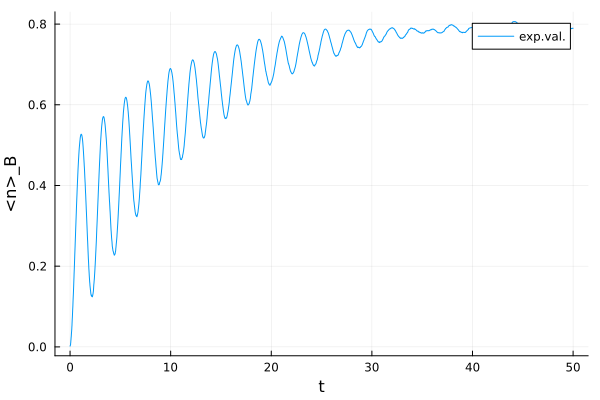

In [16]:
σp_B = kron(ide, [0 0 ; 0 1])
v_ave_up_B = zeros(length(0:dt:t_final))
for n_traj in 1:number_trajectories
    for n_t in eachindex(results[1])
        ψ = results[n_traj][n_t]
        ρ = ψ * ψ'
        v_ave_up_B[n_t] += (tr(ρ * σp_B)).re / number_trajectories
    end
end

plot(0:dt:t_final, v_ave_up_B, xlabel="t", ylabel="<n>_B", label="exp.val.")

In [26]:
initial_results = Gillespie.gillespie(H, M_l, ψ0, t_final, dt, number_trajectories, false)

Gillespie evolution... 100%|█████████████████████████████| Time: 0:00:02


-> Truncation error given by norm of latest Qs matrix: 0.011999073627007282


(Array{Dict{String, Any}}[[Dict("JumpChannel" => nothing, "ψAfter" => ComplexF64[1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im], "AbsTime" => 0, "TimeSinceLast" => 0), Dict("JumpChannel" => 1, "ψAfter" => ComplexF64[0.0 + 0.0im, 0.7942413295422666 + 0.5972250272546256im, 0.0 + 0.0im, 0.01445285177794527 + 0.11087872809123082im], "AbsTime" => 18.03, "TimeSinceLast" => 18.03), Dict("JumpChannel" => 1, "ψAfter" => ComplexF64[0.0 + 0.0im, -0.573788223506565 + 0.7630437929685713im, 0.0 + 0.0im, -0.27461592591711936 + 0.11453094695321198im], "AbsTime" => 59.36, "TimeSinceLast" => 41.33)], [Dict("JumpChannel" => nothing, "ψAfter" => ComplexF64[1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im], "AbsTime" => 0, "TimeSinceLast" => 0), Dict("JumpChannel" => 1, "ψAfter" => ComplexF64[0.0 + 0.0im, 0.5320027256677403 - 0.8447379011793736im, 0.0 + 0.0im, 0.04194429359380144 - 0.04039374243715102im], "AbsTime" => 29.18, "TimeSinceLast" => 29.18), Dict("JumpChannel" => 1, "ψAfter" => ComplexF64[

In [29]:
results = initial_results[1]

v_wtd = []

for trajectory in 1:number_trajectories
    for j in 2:length(results[trajectory])
        difference = results[trajectory][j]["TimeSinceLast"]
        push!(v_wtd, difference)
    end
end

3775-element Vector{Any}:
 18.03
 41.33
 29.18
 41.35
 24.14
 11.69
  9.16
 27.4
 11.1
  1.43
 10.24
  1.33
 33.42
  ⋮
 45.05
 15.16
  5.76
  3.23
 46.11
  3.92
 49.87
 39.45
 45.33
  4.63
  7.56
 39.27

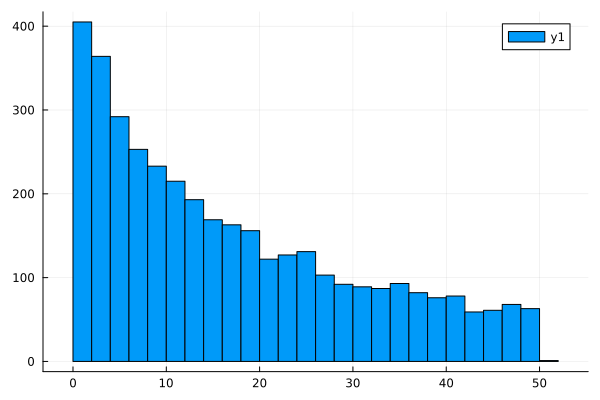

In [34]:
histogram(v_wtd, bins=45)